In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
import sqlite3
import time
%matplotlib inline

In [2]:
# Create your connection.
cnx = sqlite3.connect('greenhouse.db')
df = pd.read_sql_query("SELECT * FROM readings", cnx)


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
Origen         26 non-null object
Temperatura    26 non-null float64
Humedad        26 non-null float64
Analogo        26 non-null int64
Fecha          26 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


,Origen,Temperatura,Humedad,Analogo,Fecha
0,dc:4f:22:5f:4b:27,27.466667,1.0,1,2020-01-28 10:35:31
1,84:0d:8e:b0:f4:5c,23.000000,45.5,1,2020-01-28 10:35:31
2,dc:4f:22:5f:4b:27,27.150000,1.0,1,2020-01-28 10:35:41
3,84:0d:8e:b0:f4:5c,23.000000,45.5,1,2020-01-28 10:36:02
4,dc:4f:22:5f:4b:27,26.750000,1.3,1,2020-01-28 10:36:17


In [4]:
df.Fecha = pd.to_datetime(df.Fecha)
df.Origen = df.Origen.str.replace('84:0d:8e:b0:f4:5c', 'TipoA')
df.Origen = df.Origen.str.replace('dc:4f:22:5f:4b:27', 'TipoB')

BD = df[['Origen', 'Fecha','Temperatura', 'Humedad']]


In [5]:
BD.head()

,Origen,Fecha,Temperatura,Humedad
0,TipoB,2020-01-28 10:35:31,27.466667,1.0
1,TipoA,2020-01-28 10:35:31,23.000000,45.5
2,TipoB,2020-01-28 10:35:41,27.150000,1.0
3,TipoA,2020-01-28 10:36:02,23.000000,45.5
4,TipoB,2020-01-28 10:36:17,26.750000,1.3


Origen
TipoA    AxesSubplot(0.125,0.125;0.775x0.755)
TipoB    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Temperatura, dtype: object

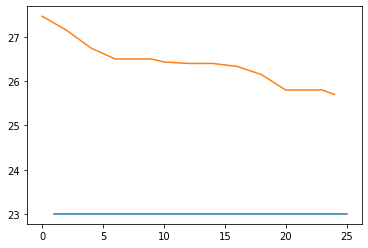

In [6]:
BD.groupby('Origen').Temperatura.plot()


Origen
TipoA    AxesSubplot(0.125,0.125;0.775x0.755)
TipoB    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Humedad, dtype: object

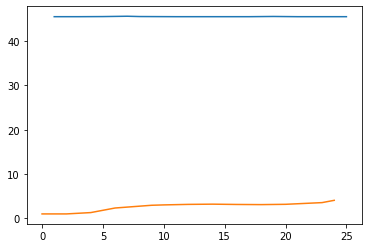

In [7]:
BD.groupby('Origen').Humedad.plot()